In [173]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [174]:
n = 1000

X_pos = np.random.randn(n//2, 2) + np.array([3, 3])
X_neg = np.random.randn(n//2, 2) + np.array([-3, -3])

X = np.vstack((X_pos, X_neg))
y = np.hstack((np.ones(n//2), -np.ones(n//2)))

In [175]:
X.shape

(1000, 2)

In [176]:
y.shape

(1000,)

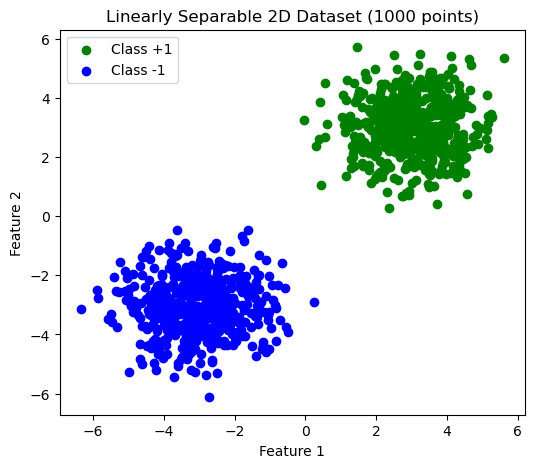

In [177]:
plt.figure(figsize=(6,5))
plt.scatter(X_pos[:,0], X_pos[:,1], c='green', label='Class +1')
plt.scatter(X_neg[:,0], X_neg[:,1], c='blue', label='Class -1')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable 2D Dataset (1000 points)")
plt.legend()
plt.show()

In [195]:
class perceptron:
    def __init__(self,epochs=100,lr=0.1):
        self.lr = lr
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None

    def fit(self,X_train,y_train):
        self.intercept_ = 0.0
        self.coef_ = np.zeros(X_train.shape[1])

        for i in range(self.epochs):
            idx = np.random.permutation(X_train.shape[0])
            X_train = X_train[idx]
            y_train = y_train[idx]
            for j in range(X_train.shape[0]):

                z = np.dot(X_train[j],self.coef_) + self.intercept_

                if z*y_train[j] <= 0:
                    self.coef_ = self.coef_ + self.lr * (y_train[j] * X_train[j])
                    self.intercept_ = self.intercept_ + self.lr * y_train[j]

        return self


    def predict(self, X_test):
        z = np.dot(X_test, self.coef_) + self.intercept_
        return np.where(z >= 0, 1, -1)

        

In [196]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [197]:
p1 = perceptron()

In [198]:
from sklearn.linear_model import Perceptron
p2 = Perceptron()

In [199]:
p1.fit(X_train,y_train)
p2.fit(X_train,y_train)

Perceptron()

In [200]:
from sklearn.metrics import accuracy_score

print("My perceptron accuracy:", accuracy_score(y_test, p1.predict(X_test)))
print("Sklearn perceptron accuracy:", accuracy_score(y_test, p2.predict(X_test)))


My perceptron accuracy: 1.0
Sklearn perceptron accuracy: 1.0


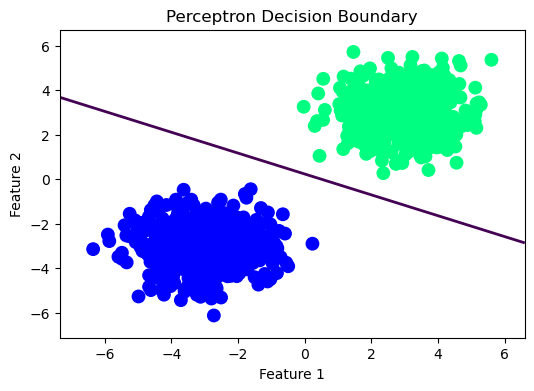

In [201]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid over feature space
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Compute model output on grid
Z = p1.coef_.ravel()[0] * xx + p1.coef_.ravel()[1] * yy + p1.intercept_


# Plot
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=80)

# Decision boundary (Z = 0)
plt.contour(xx, yy, Z, levels=[0], linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary")
plt.show()


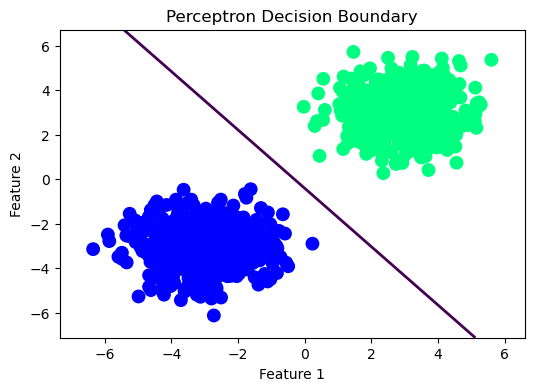

In [202]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid over feature space
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Compute model output on grid
Z = p2.coef_.ravel()[0] * xx + p2.coef_.ravel()[1] * yy + p2.intercept_


# Plot
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', s=80)

# Decision boundary (Z = 0)
plt.contour(xx, yy, Z, levels=[0], linewidths=2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary")
plt.show()


In [203]:
import numpy as np

y_noisy = y.copy()

n_noise = int(0.1 * len(y))   # 10% of data
noise_idx = np.random.choice(len(y), n_noise, replace=False)

# flip labels
y_noisy[noise_idx] *= -1


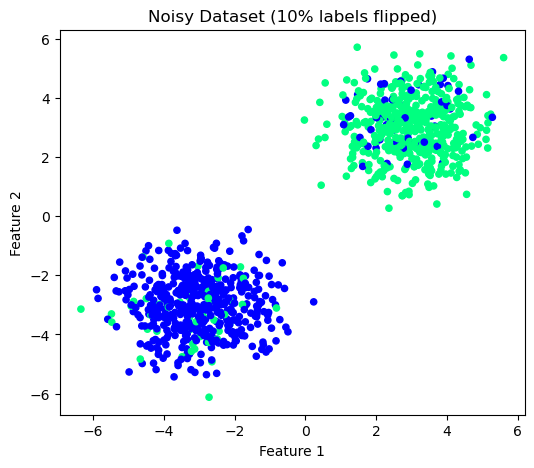

In [204]:
plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=y_noisy, cmap='winter', s=20)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Noisy Dataset (10% labels flipped)")
plt.show()


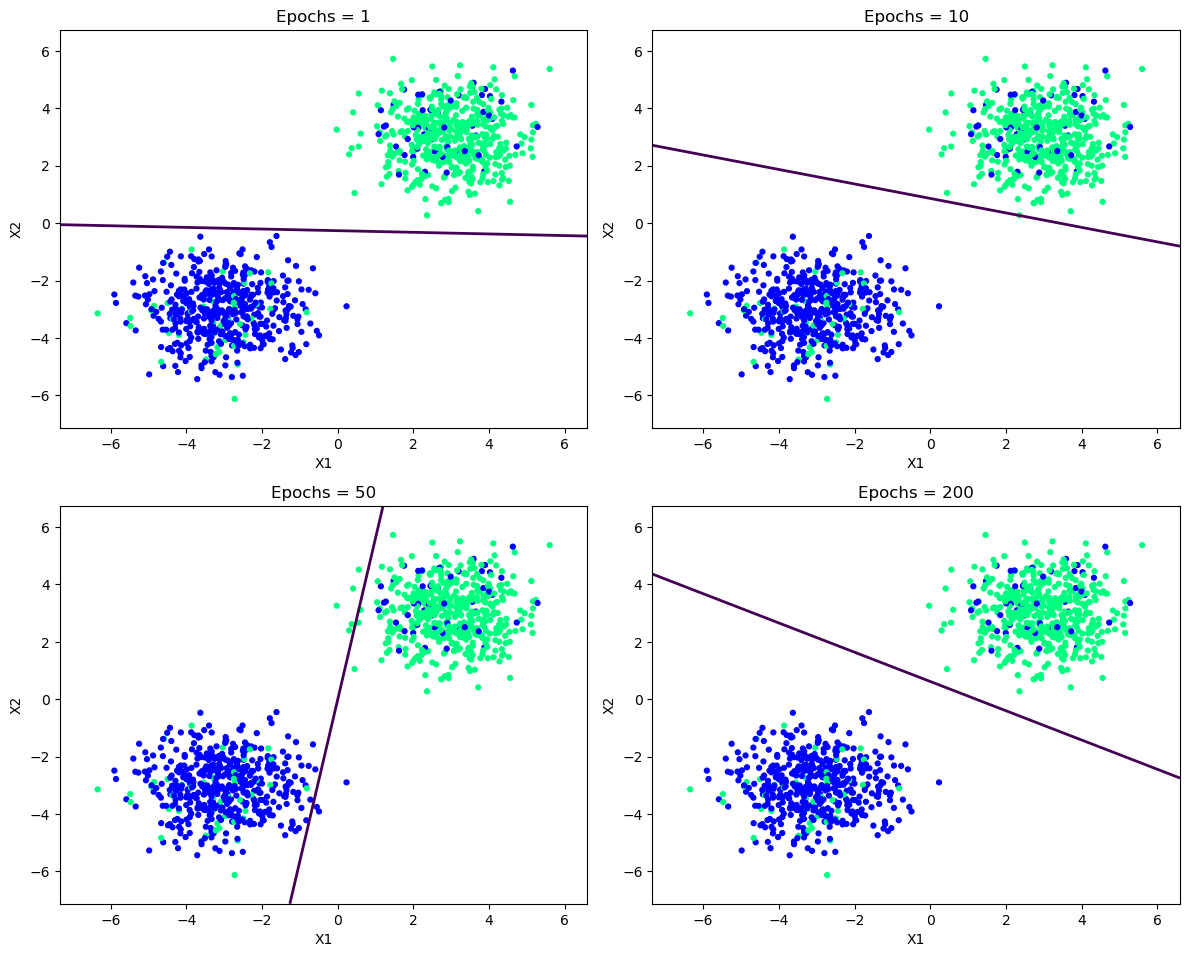

In [207]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

epochs_list = [1, 10, 50, 200]

rows = 3
cols = 2

plt.figure(figsize=(12, 14))

for idx, ep in enumerate(epochs_list):

    p = perceptron(epochs=ep, lr=0.1)
    p.fit(X, y_noisy)

    # grid
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = p.coef_[0]*xx + p.coef_[1]*yy + p.intercept_

    plt.subplot(rows, cols, idx+1)
    plt.scatter(X[:,0], X[:,1], c=y_noisy, cmap='winter', s=12)
    plt.contour(xx, yy, Z, levels=[0], linewidths=2)
    plt.title(f"Epochs = {ep}")
    plt.xlabel("X1")
    plt.ylabel("X2")

plt.tight_layout()
plt.show()
